<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-de-pacotes" data-toc-modified-id="Import-de-pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import de pacotes</a></span></li><li><span><a href="#Leitura-do-dado-tratado" data-toc-modified-id="Leitura-do-dado-tratado-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Leitura do dado tratado</a></span></li><li><span><a href="#Visualização" data-toc-modified-id="Visualização-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualização</a></span><ul class="toc-item"><li><span><a href="#Distribuição-de-um-certo-grupo-de-parâmetros" data-toc-modified-id="Distribuição-de-um-certo-grupo-de-parâmetros-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distribuição de um certo grupo de parâmetros</a></span></li><li><span><a href="#Olhando-todas-as-chamadas-no-tempo-1" data-toc-modified-id="Olhando-todas-as-chamadas-no-tempo-1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Olhando todas as chamadas no tempo 1</a></span></li></ul></li></ul></div>

## Import de pacotes

In [1]:
import os,sys
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
sys.path.append('..')
from config import *
from utils import *

## Leitura do dado tratado

In [3]:
df = pd.read_pickle(os.path.join(TRTD_DATA_PATH,'eventos.pkl'))

## Visualização

### Distribuição de um certo grupo de parâmetros 

In [4]:
df['t'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48,  1,  2,  3,  4])

In [7]:
def calcular_distribuicao_teste(df,t,g,i,p):
    '''
    Calcula a distribuição de número de chamadas para um conjunto de filtros

    Parâmetros
    ----------
    df : {pandas.DataFrame}
        Dataframe com chamadas.
    t : {int}
        Período de tempo do dia (ex: 30 em 30 min).
    g : {int}
        Grupo de dias (ex: dias de semana).
    i : {int}
        Grupo geográfico discretizado.
    p : {int}
        Indicador de prioridade (1 a 3).
    '''
    filtro = df.copy()
    # aplicar filtros
    filtro = filtro[
        (filtro['t']==t) &
        (filtro['grupo_dia']==g) &
        (filtro['geo_discr'].str[2:].astype(int)==i) &
        (filtro['TipoViatura']==p)
    ]
    
    # pegar datas com chamadas
    datas = filtro.groupby('data')['hora'].count()
    
    # adicionar datas sem chamadas (com zero)
    dt_range = pd.date_range(df['data'].min(),df['data'].max())
    for dt in dt_range:

        # se a data passa no filtro de grupo
        if grupo_dias_dict[2][dt.weekday()] == g:
            if not(dt in datas.index):
                datas[dt] = 0
    datas.sort_index(inplace=True)

    return datas.values

In [12]:
df.head()

,data_idx,Prioridade,TotalViaturas,latitude,longitude,data,hora,TipoViatura,Coordenadas,grupo_dia,discr_x,discr_y,geo_discr,t
0,2016-01-01 02:13:00,0,1,-22.876186,-43.675890,2016-01-01,2:13:05,1,POINT (-43.67589 -22.876186),5,5,8,d-26,5
1,2016-01-01 02:17:00,1,1,-22.906627,-43.293335,2016-01-01,2:17:06,2,POINT (-43.293335 -22.906627),5,4,11,d-18,5
2,2016-01-01 02:28:00,0,1,-23.012424,-43.541721,2016-01-01,2:28:08,1,POINT (-43.541721 -23.012424),5,3,9,d-5,5
3,2016-01-01 02:51:00,0,2,-22.851838,-43.357152,2016-01-01,2:51:25,1,POINT (-43.357152 -22.851838),5,5,11,d-29,6
4,2016-01-01 03:00:00,0,1,-22.824990,-43.392745,2016-01-01,3:00:47,1,POINT (-43.392745 -22.82499),5,5,10,d-28,7


In [11]:
calcular_distribuicao_teste(
    df,
    t=17,
    g=1,
    i=2,
    p=1
)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

(array([402.,   0.,   0., 104.,   0.,   0.,  15.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

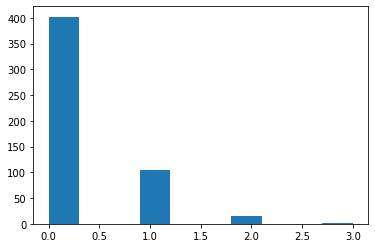

In [12]:
datas = calcular_distribuicao(df,6,1,29,1)
plt.hist(datas)

### Olhando todas as chamadas no tempo 1

In [10]:
df['str_i'] = df['geo_discr'].astype(str)
px.scatter_geo(
    df[(df['t'].isin([1,2]))],
    lat='latitude',lon='longitude',
    color='str_i',
    center={'lat':-22,'lon':-42},
    scope='south america'
)